<a href="https://colab.research.google.com/github/saswata121924/Anayze_and_Predict_Revenue_For_Films/blob/main/Anayze_and_Predict_Revenue_For_Films.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df_raw_data = pd.read_csv("cost_revenue_dirty.csv")
print(df_raw_data.shape)
df_raw_data.head()

(5391, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [2]:
df_raw_data.isna().values.any()

False

In [3]:
df_raw_data.duplicated().any()

False

In [4]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [5]:
df_raw_data["Release_Date"] = pd.to_datetime(df_raw_data['Release_Date'])
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   object        
 4   USD_Worldwide_Gross    5391 non-null   object        
 5   USD_Domestic_Gross     5391 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 252.8+ KB


In [6]:
chars_to_remove = ['$', ',']
columns_to_clean = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
for column in columns_to_clean:
  for char in chars_to_remove:
    df_raw_data[column]= df_raw_data[column].astype(str).str.replace(char, "")
  df_raw_data[column] = pd.to_numeric(df_raw_data[column])
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


<ipython-input-6-575ad19cd40f>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_raw_data[column]= df_raw_data[column].astype(str).str.replace(char, "")


In [7]:
df_raw_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [8]:
df_raw_data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [9]:
count = df_raw_data[df_raw_data["USD_Domestic_Gross"]==0].shape[0]
print(f"No. of films that grossed 0 domestically: {count}")

No. of films that grossed 0 domestically: 512


In [10]:
low_prod_budget = df_raw_data["USD_Production_Budget"].min()
df_raw_data[df_raw_data["USD_Production_Budget"]==low_prod_budget]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [11]:
high_prod_budget = df_raw_data["USD_Production_Budget"].max()
df_raw_data[df_raw_data["USD_Production_Budget"]==high_prod_budget]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [12]:
count = df_raw_data[df_raw_data["USD_Worldwide_Gross"]==0].shape[0]
print(f"No. of films that grossed 0 globally: {count}")

No. of films that grossed 0 globally: 357


In [13]:
count = df_raw_data[df_raw_data["Release_Date"]>'2018-05-01'].shape[0]
print(f"Number of unreleased movies: {count}")
data_clean = df_raw_data[df_raw_data["Release_Date"]<='2018-05-01']
data_clean.sort_values(by='Release_Date', ascending=False)

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
...,...,...,...,...,...,...
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
1,5140,1916-05-09,Intolerance,385907,0,0


In [14]:
count = len(data_clean[data_clean["USD_Production_Budget"]>data_clean["USD_Worldwide_Gross"]])
print(f"Number of films that did not break even: {count} and the percentage is {round(count/len(data_clean)*100,2)}%")

Number of films that did not break even: 2007 and the percentage is 37.28%


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# importing seaborn and matplotlib

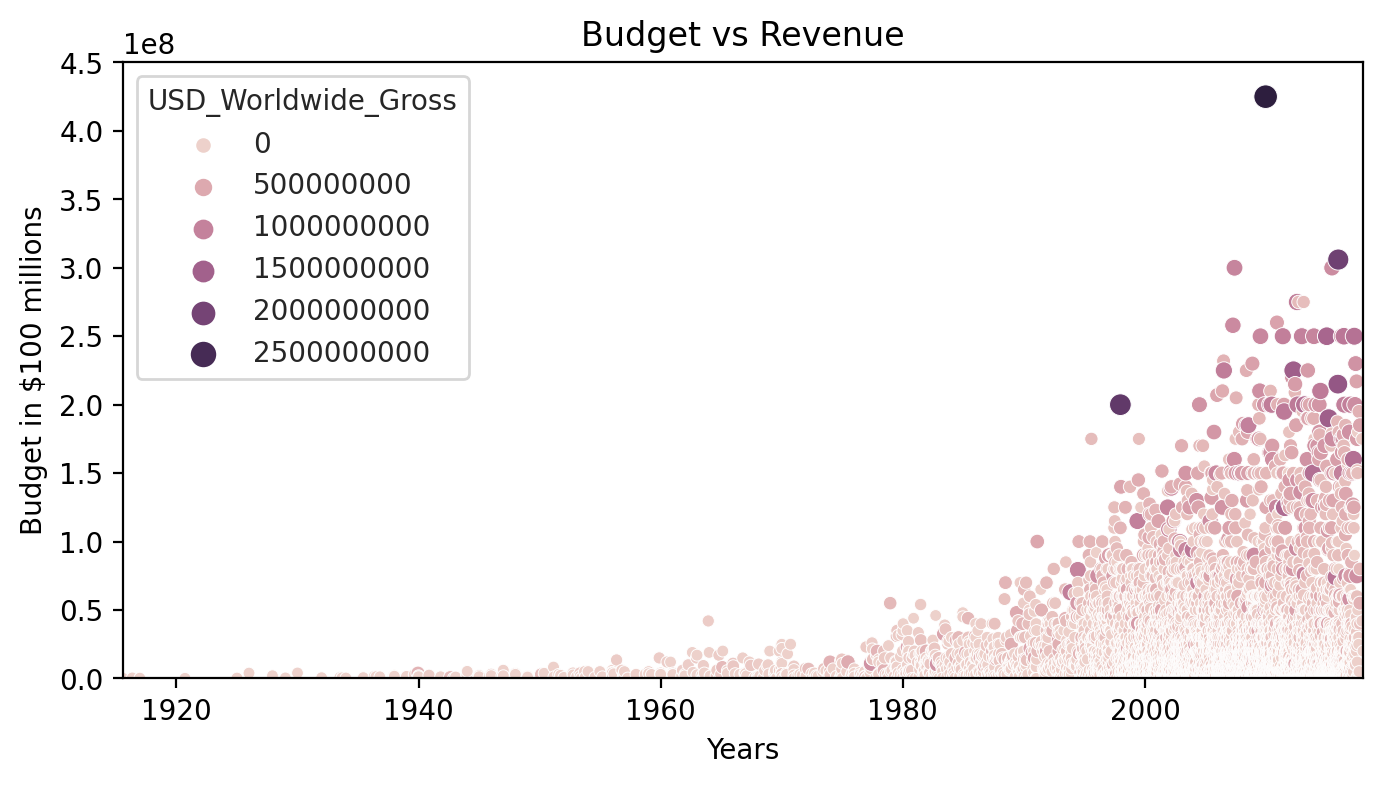

In [17]:
plt.figure(figsize=(8,4), dpi=200)
plt.title("Budget vs Revenue")
with sns.axes_style('whitegrid'):
  sns.scatterplot(data_clean,
                  x="Release_Date",
                  y="USD_Production_Budget",
                  hue="USD_Worldwide_Gross",
                  size="USD_Worldwide_Gross").set(ylim=(0,450000000),
                                                 xlim=(data_clean.Release_Date.min(),data_clean.Release_Date.max()),
                                                 xlabel="Years",
                                                 ylabel="Budget in $100 millions")

In [31]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
decades = (years//10)*10
data_clean["Decades"] = decades
data_clean.head()

<ipython-input-31-df044c0a4626>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Decades"] = decades


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [32]:
old_films = data_clean[data_clean.Decades < 1970]
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [33]:
new_films = data_clean[data_clean.Decades >= 1970]
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decades
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


In [42]:
print(f"No. of films released prior to 1970 are: {len(old_films)}")
budget = old_films["USD_Production_Budget"].max()
film_name = old_films[old_films["USD_Production_Budget"]==budget]["Movie_Title"]
film_name = film_name.values[0]
print(f"Most expensive film made prior to 1970 is {film_name} with a budget of ${budget}")

No. of films released prior to 1970 are: 153
Most expensive film made prior to 1970 is Cleopatra with a budget of $42000000


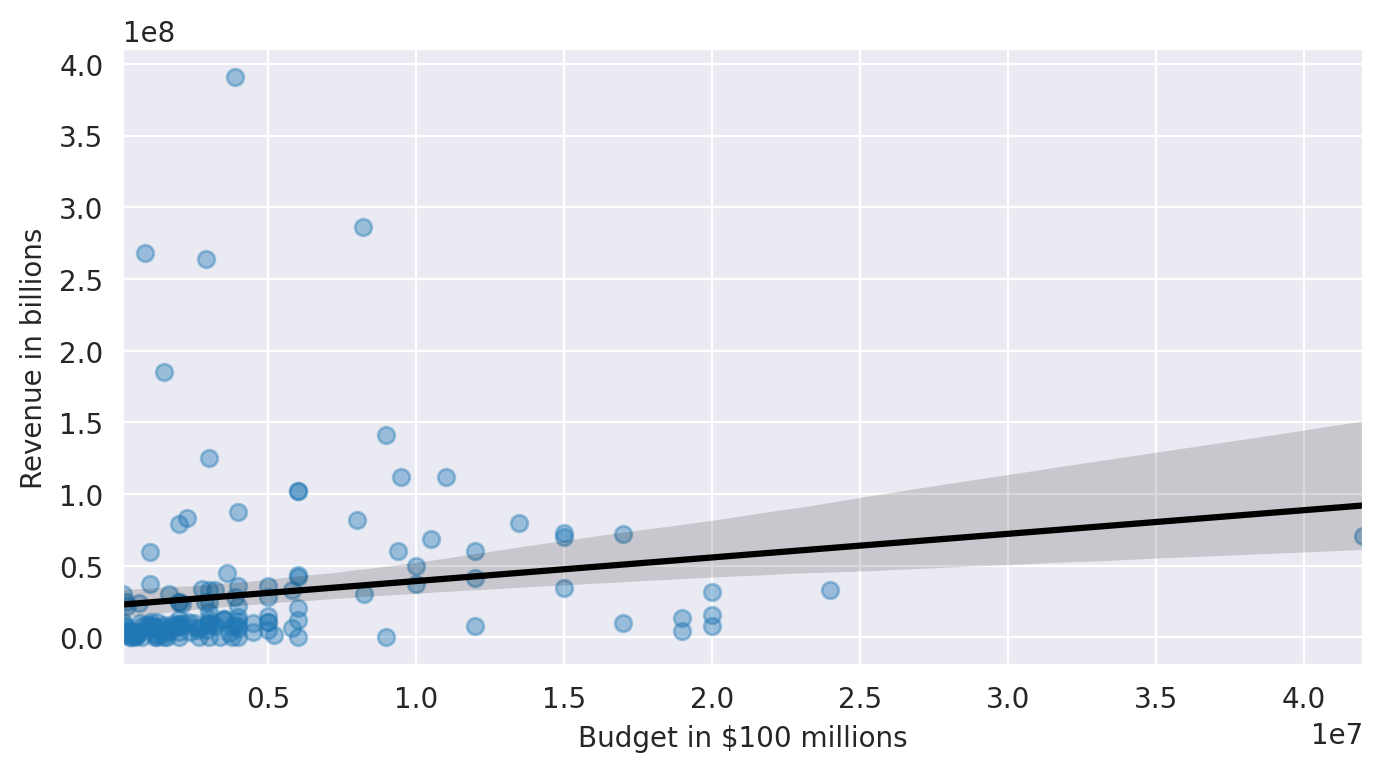

In [56]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  sns.regplot(old_films,
              x="USD_Production_Budget",
              y="USD_Worldwide_Gross",
              scatter_kws={'alpha':0.4},
              line_kws={'color':'black'}).set(xlabel="Budget in $100 millions",
                                              ylabel="Revenue in billions",
                                              xlim=(old_films.USD_Production_Budget.min(), old_films.USD_Production_Budget.max()))

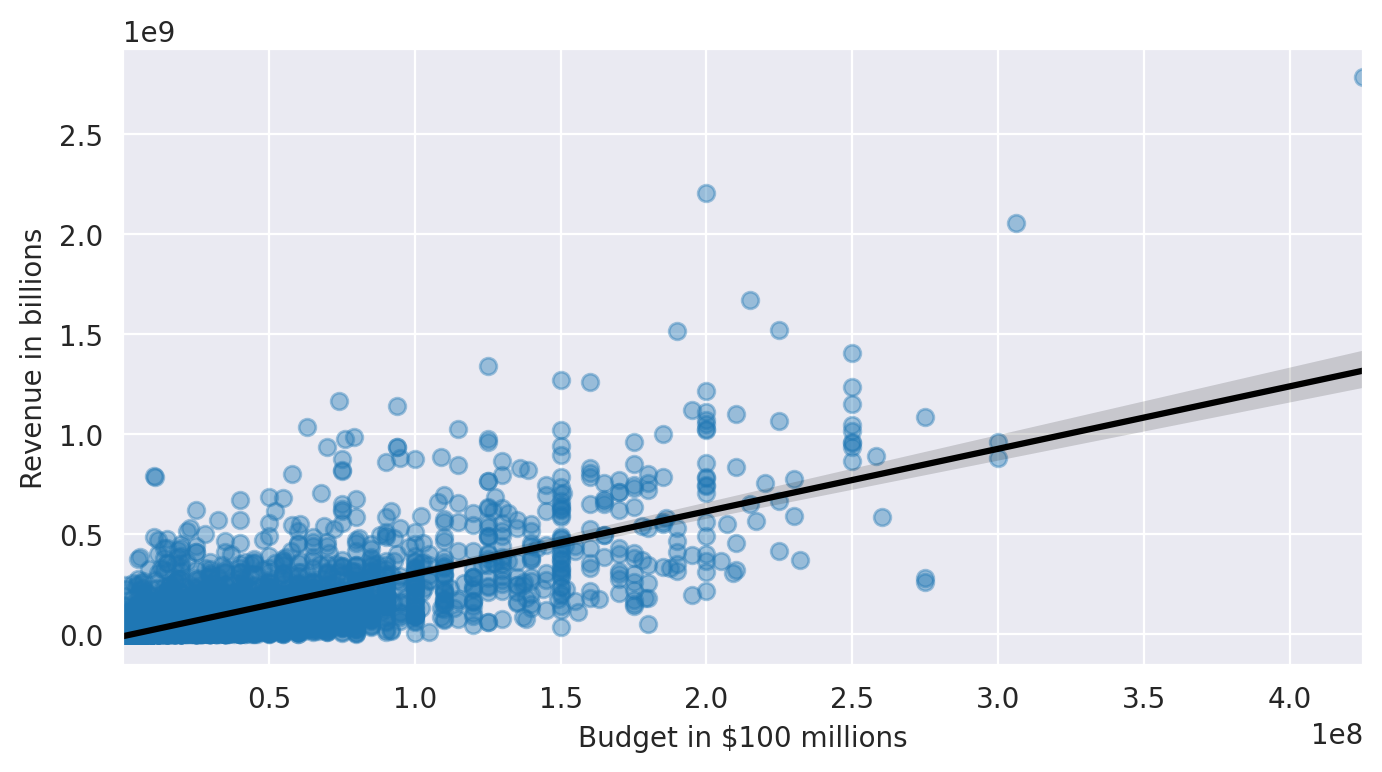

In [57]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  sns.regplot(new_films,
              x="USD_Production_Budget",
              y="USD_Worldwide_Gross",
              scatter_kws={'alpha':0.4},
              line_kws={'color':'black'}).set(xlabel="Budget in $100 millions",
                                              ylabel="Revenue in billions",
                                              xlim=(new_films.USD_Production_Budget.min(), new_films.USD_Production_Budget.max()))

In [58]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [68]:
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

#Find the best fit line
regression.fit(X,y)
c = regression.intercept_[0]
m = regression.coef_[0]

print(f"Intercept= {c}, Slope= {m} for dataset of films prior to 2017")

Intercept= 22821538.635080386, Slope= [1.64771314] for dataset of films prior to 2017


In [69]:
variance_fit = regression.score(X,y)
print(f"This means that our model explains around {round(variance_fit*100,2)}% of the variance in movie revenue for the movies prior to 2017")

This means that our model explains around 2.94% of the variance in movie revenue for the movies prior to 2017


In [80]:
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

#Find the best fit line
regression.fit(X,y)
c = regression.intercept_[0]
m = regression.coef_[0,0]

print(f"Intercept= {c}, Slope= {m} for dataset of films from 2017 onwards")

Intercept= -8650768.006610274, Slope= 3.1225959173210933 for dataset of films from 2017 onwards


In [71]:
variance_fit = regression.score(X,y)
print(f"This means that our model explains around {round(variance_fit*100,2)}% of the variance in movie revenue for the movies released 2017 onwards")

This means that our model explains around 55.77% of the variance in movie revenue for the movies released 2017 onwards


In [87]:
# Using our model to make prediction for latest movies with budget around $600 million

budget = int(input("Provide an approximate budget for making the film: "))
revenue = c + (m*budget)
print(f"The Revenue prediction is ${revenue:.12} for a film with budget of ${budget}")

Provide an approximate budget for making the film: 450000000
The Revenue prediction is $1396517394.79 for a film with budget of $450000000
